In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
# Data collection and processing 
gold_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\myenv\Supervised ML\Regression\Data\gld_price_data.csv')

In [33]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [34]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [35]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [36]:
gold_data.shape

(2290, 6)

In [37]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [38]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [39]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Finding Corelation Between the data

1] Positive Corelation
2] Negitive Corelation

In [40]:
gold_data = gold_data.drop(columns='Date')
correlation = gold_data.corr()

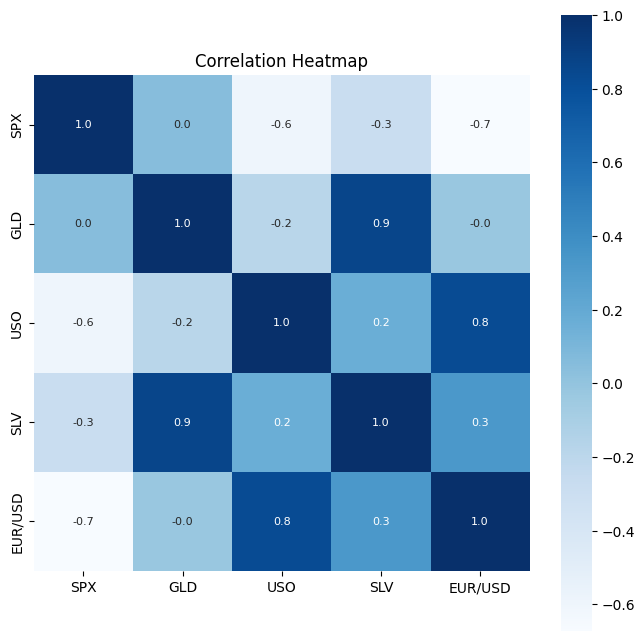

In [43]:
# constructing a heatmap to understand the correalation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# correlation values of GLD
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23512\1771736525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

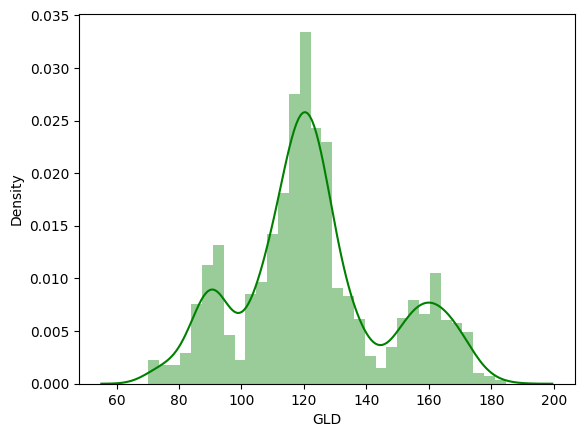

In [45]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [47]:
gold_data.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

# spliting the feature

In [51]:
x = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [52]:
x.columns

Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [53]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Spliting into training data and testing data

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Random Forest Model

In [55]:
regressor = RandomForestRegressor(n_estimators=100)


In [56]:
# Training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

# Model Evaluation 

In [57]:
# Prediction on test data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.73539905  81.64969967 115.82070032 127.64730092 120.91510111
 154.66019761 150.2987983  126.16040031 117.51629874 126.07560049
 116.56730084 171.87350101 141.64199896 167.88909855 115.21130008
 117.86440041 137.83160323 169.94570091 159.5415031  158.14999911
 155.0686001  125.29280006 175.45659937 157.29060409 125.2148003
  93.8546998   77.44040007 120.60010012 119.01519917 167.46340015
  88.00390059 125.14850025  91.26960094 117.60680056 121.09119904
 136.2509009  115.46090142 115.17980098 147.89199965 107.14220093
 104.68700234  87.01439762 126.57150013 118.02260031 152.37799901
 119.47710028 108.30059979 108.17329834  93.2144007  127.09019797
  75.03370012 113.6111993  121.32430031 111.27309912 118.88789891
 120.70409962 158.89010063 170.00340134 147.0244969   85.84549849
  94.31320035  86.8235987   90.32759993 118.94980083 126.46510087
 127.46739975 169.65189948 122.28199938 117.56979865  98.31270076
 168.38290149 143.13249787 132.22650247 121.308302   121.3276991
 119.7179004

In [58]:
# Now we need to compare predicted value with actual value
# R squared value
error_score = metrics.r2_score(y_test,test_data_prediction)

In [60]:
print("R squared error : ",error_score)

R squared error :  0.9888828026323782


# Compare the actual value and predicted value

In [61]:
y_test = list(y_test)

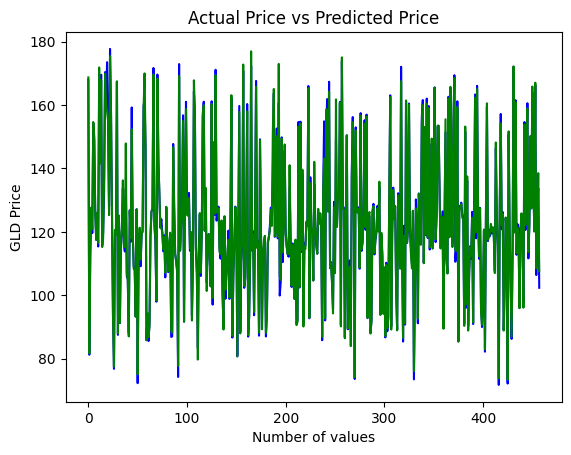

In [62]:
plt.plot(y_test,color='blue',label='Actual Value') # actual value
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.show()